In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-09-33-29.csv")
results['datetime'] = pd.to_datetime(results['datetime'], errors='coerce')
results

,Unnamed: 0,datetime,charge_solar,charge_load,discharge_size,current_solar,current_controlled_load_consumption,current_general_electricity_consumption,current_charge
0,0,2012-01-08 00:30:00,0.079256,0.137856,0.751981,0.0,1.250,0.109,0.000000
1,1,2012-01-08 01:00:00,0.066827,0.108759,0.975174,0.0,1.238,0.299,0.000000
2,2,2012-01-08 01:30:00,0.483538,0.149067,0.966788,0.0,1.256,0.375,0.000000
3,3,2012-01-08 02:00:00,0.539519,0.101085,0.983653,0.0,1.150,0.978,0.000000
4,4,2012-01-08 02:30:00,0.521301,0.149247,0.977119,0.0,0.131,1.027,0.565871
...,...,...,...,...,...,...,...,...,...
234,234,2012-01-12 21:30:00,0.202543,0.279451,0.318082,0.0,0.000,0.290,0.200901
235,235,2012-01-12 22:00:00,0.210477,0.304235,0.343517,0.0,0.000,0.284,0.200901
236,236,2012-01-12 22:30:00,0.235540,0.335037,0.332817,0.0,0.000,0.283,0.203121
237,237,2012-01-12 23:00:00,0.200908,0.328604,0.300864,0.0,0.000,0.874,0.230861


In [21]:
results_long = results.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime"])
results_long

,datetime,variable,value
0,2012-01-08 00:30:00,charge_solar,0.079256
1,2012-01-08 01:00:00,charge_solar,0.066827
2,2012-01-08 01:30:00,charge_solar,0.483538
3,2012-01-08 02:00:00,charge_solar,0.539519
4,2012-01-08 02:30:00,charge_solar,0.521301
...,...,...,...
1668,2012-01-12 21:30:00,current_charge,0.200901
1669,2012-01-12 22:00:00,current_charge,0.200901
1670,2012-01-12 22:30:00,current_charge,0.203121
1671,2012-01-12 23:00:00,current_charge,0.230861


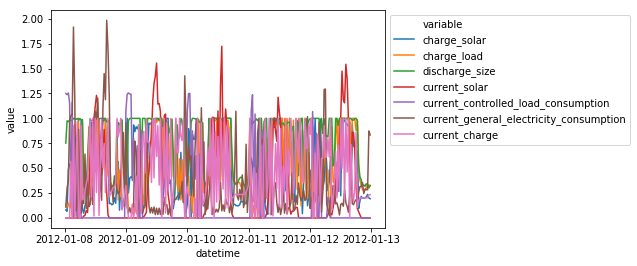

In [22]:
sns.lineplot(data=results_long, x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

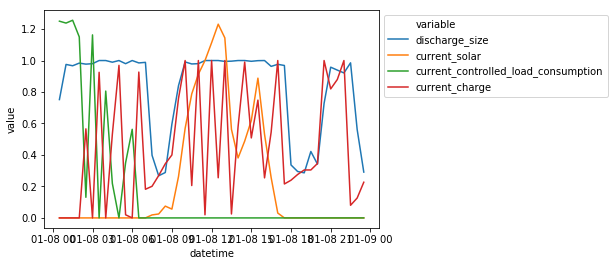

In [23]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "discharge_size","current_controlled_load_consumption"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-09"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

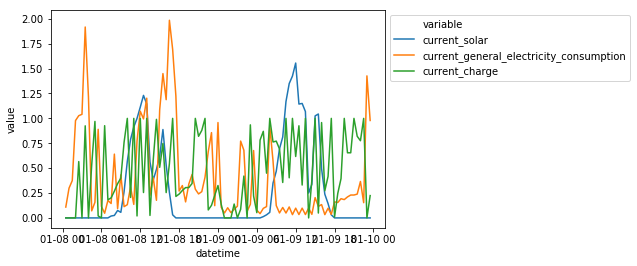

In [24]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "current_general_electricity_consumption"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-10"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

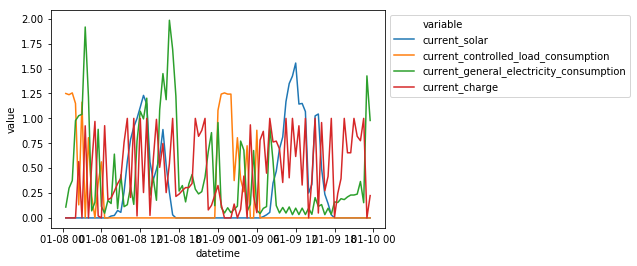

In [25]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_general_electricity_consumption", "current_controlled_load_consumption","current_solar"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-10"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)